# Calculate Effect Size for HFO Analysis

Using pre-calculated HFOs, determine the effect size of the difference of hfo rates pre and post resection

In [1]:
from pathlib import Path
from mne_bids import (read_raw_bids, BIDSPath,
                     get_entity_vals, get_datatypes,
                     make_report)
from mne_hfo import LineLengthDetector, RMSDetector
from mne_hfo.io import read_annotations
from mne_hfo.posthoc import compute_chs_hfo_rates
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pingouin as pg
from sklearn.utils import resample
import seaborn as sns
import ptitprince as pt
from hyppo.ksample import KSample

Find all the paths to the result files for HFO detections. Put them into a dictionary with subjectID keys

In [2]:
reference = "average"
detector="linelength"

fpaths = {
    "E1": [],
    "E3": [],
    "E4": [],
    "E5": [],
    "E6": [],
    "E7": [],
    "E8": []
}
sessions = {
    "postresection": "post",
    "preresection": "pre"
}
bids_root = Path("C:/Users/patri/Johns Hopkins/Adam Li - sickkids")
subjects = get_entity_vals(bids_root, 'subject')
derivative_path = bids_root / "derivatives"
derivative_chain = "hfo/average"
derivative_dir = derivative_path / derivative_chain
for subjectID in subjects:
    for sessionID, taskID in sessions.items():
        bids_paths = BIDSPath(subject=subjectID, session=sessionID,
                          datatype="ieeg",
                          suffix="ieeg", task=taskID,
                          acquisition='ecog',
                          processing=detector,
                          run='01',
                          extension=".vhdr", root=derivative_dir)
        hfo_fpath = str(bids_paths).replace("_ieeg.vhdr", "_desc-hfo_ieeg.tsv")
        if Path(hfo_fpath).exists():
            fpaths[subjectID].append(hfo_fpath)


C:\Users\patri\.virtualenvs\sickkids--kKd4nio\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Load the results into annotation dataframes. Calculate the rate of HFOs per channel and put these lists into a dictionary that separates pre and post resection detections

In [3]:
%%capture
hfos =  {
    "E1": {
        "preresection": None,
        "postresection": None,
    },
    "E3": {
        "preresection": None,
        "postresection": None,
    },
    "E4": {
        "preresection": None,
        "postresection": None,
    },
    "E5": {
        "preresection": None,
        "postresection": None,
    },
    "E6": {
        "preresection": None,
        "postresection": None,
    },
    "E7": {
        "preresection": None,
        "postresection": None,
    },
}
for subject, recordings in fpaths.items():
    if recordings:
        post_tsv = recordings[0]
        pre_tsv = recordings[1]
        # Read tsv files into annotation dataframes
        post_annotations = read_annotations(post_tsv)
        pre_annotations = read_annotations(pre_tsv)
        # Calculate hfos/min for each channel
        hfos[subject]["postresection"] = compute_chs_hfo_rates(post_annotations, 'm')
        hfos[subject]["preresection"] = compute_chs_hfo_rates(pre_annotations, 'm')

In [4]:
post_fpath = fpaths["E5"][1]
annotations = read_annotations(post_fpath)

Extracting parameters from C:\Users\patri\Johns Hopkins\Adam Li - sickkids\sub-E5\ses-preresection\ieeg\sub-E5_ses-preresection_task-pre_acq-ecog_run-01_ieeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\Johns Hopkins\Adam Li - sickkids\sub-E5\ses-preresection\ieeg\sub-E5_ses-preresection_task-pre_acq-ecog_run-01_channels.tsv.
Reading in coordinate system frame other: None.
Reading electrode coords from C:\Users\patri\Johns Hopkins\Adam Li - sickkids\sub-E5\ses-preresection\ieeg\sub-E5_ses-preresection_acq-ecog_space-fs_electrodes.tsv.
The read in electrodes file is: 
 [('name', ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'ML1', 'ML2', 'ML3', 'ML4', 'ML5', 'ML6', 'F3C1',

d:\desktop\mne-hfo\mne_hfo\io.py:364: RuntimeWarning: Did not find any events.tsv associated with sub-E5_ses-preresection_task-pre_acq-ecog_run-01.

The search_str was "C:\Users\patri\Johns Hopkins\Adam Li - sickkids\sub-E5\**\sub-E5_ses-preresection*events.tsv"
  raw = read_raw_bids(raw_fpath)
d:\desktop\mne-hfo\mne_hfo\io.py:364: RuntimeWarning: There are channels without locations (n/a) that are not marked as bad: ['C2', 'C3', 'C4', 'C5', 'C6', 'C8', 'C10', 'C12', 'C13', 'C14', 'C15', 'C16', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'ML1', 'ML2', 'ML3', 'ML4', 'ML5', 'ML6', 'F3C1', 'F3C2', 'F3C3', 'F3C4', 'F3C5', 'F3C6', 'F1OF1', 'F1OF2', 'F1OF3', 'F1OF4', 'F1OF5', 'F1OF6', 'C67', 'C68', 'C69', 'C70', 'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C79', 'C80', 'C81', 'C82', 'C83', 'C84', 'C85', 'C86', 'C87', 'C88', 'C89',

In [5]:
[print(ann) for ann in annotations.iterrows()]

(0, onset       2.8304
duration    0.0976
label          hfo
channels        C2
sample      5800.0
Name: 0, dtype: object)
(1, onset       3.7942
duration    0.0732
label          hfo
channels        C2
sample      7775.0
Name: 1, dtype: object)
(2, onset       3.8918
duration    0.1098
label          hfo
channels        C2
sample      7975.0
Name: 2, dtype: object)
(3, onset       4.2944
duration    0.0854
label          hfo
channels        C2
sample      8800.0
Name: 3, dtype: object)
(4, onset         7.991
duration     0.0732
label           hfo
channels         C2
sample      16375.0
Name: 4, dtype: object)
(5, onset        8.1008
duration     0.0732
label           hfo
channels         C2
sample      16600.0
Name: 5, dtype: object)
(6, onset       10.4188
duration      0.061
label           hfo
channels         C2
sample      21350.0
Name: 6, dtype: object)
(7, onset       12.1512
duration      0.061
label           hfo
channels         C2
sample      24900.0
Name: 7, dtype: obje

Name: 316, dtype: object)
(317, onset          75.64
duration       0.061
label            hfo
channels          C5
sample      155000.0
Name: 317, dtype: object)
(318, onset        76.1036
duration       0.061
label            hfo
channels          C5
sample      155950.0
Name: 318, dtype: object)
(319, onset        79.8612
duration       0.061
label            hfo
channels          C5
sample      163650.0
Name: 319, dtype: object)
(320, onset        82.7892
duration      0.0732
label            hfo
channels          C5
sample      169650.0
Name: 320, dtype: object)
(321, onset        83.6188
duration       0.061
label            hfo
channels          C5
sample      171350.0
Name: 321, dtype: object)
(322, onset        83.8384
duration       0.061
label            hfo
channels          C5
sample      171800.0
Name: 322, dtype: object)
(323, onset         85.034
duration      0.0732
label            hfo
channels          C5
sample      174250.0
Name: 323, dtype: object)
(324, onset    

Name: 396, dtype: object)
(397, onset        89.6334
duration       0.061
label            hfo
channels          C6
sample      183675.0
Name: 397, dtype: object)
(398, onset         89.731
duration       0.061
label            hfo
channels          C6
sample      183875.0
Name: 398, dtype: object)
(399, onset        89.8286
duration      0.0732
label            hfo
channels          C6
sample      184075.0
Name: 399, dtype: object)
(400, onset        90.4508
duration       0.061
label            hfo
channels          C6
sample      185350.0
Name: 400, dtype: object)
(401, onset        90.5484
duration      0.0732
label            hfo
channels          C6
sample      185550.0
Name: 401, dtype: object)
(402, onset        92.1344
duration       0.061
label            hfo
channels          C6
sample      188800.0
Name: 402, dtype: object)
(403, onset         92.232
duration      0.0732
label            hfo
channels          C6
sample      189000.0
Name: 403, dtype: object)
(404, onset    

Name: 784, dtype: object)
(785, onset        65.5628
duration      0.0854
label            hfo
channels         C14
sample      134350.0
Name: 785, dtype: object)
(786, onset        66.4656
duration      0.0732
label            hfo
channels         C14
sample      136200.0
Name: 786, dtype: object)
(787, onset        66.8072
duration      0.0732
label            hfo
channels         C14
sample      136900.0
Name: 787, dtype: object)
(788, onset        71.7482
duration       0.061
label            hfo
channels         C14
sample      147025.0
Name: 788, dtype: object)
(789, onset        71.8458
duration      0.0732
label            hfo
channels         C14
sample      147225.0
Name: 789, dtype: object)
(790, onset        72.1508
duration       0.061
label            hfo
channels         C14
sample      147850.0
Name: 790, dtype: object)
(791, onset         72.773
duration      0.0732
label            hfo
channels         C14
sample      149125.0
Name: 791, dtype: object)
(792, onset    

Name: 866, dtype: object)
(867, onset        71.4554
duration      0.0732
label            hfo
channels         C15
sample      146425.0
Name: 867, dtype: object)
(868, onset        72.5778
duration      0.0732
label            hfo
channels         C15
sample      148725.0
Name: 868, dtype: object)
(869, onset         79.361
duration       0.061
label            hfo
channels         C15
sample      162625.0
Name: 869, dtype: object)
(870, onset        79.4098
duration      0.0976
label            hfo
channels         C15
sample      162725.0
Name: 870, dtype: object)
(871, onset        81.7034
duration      0.0732
label            hfo
channels         C15
sample      167425.0
Name: 871, dtype: object)
(872, onset        83.3992
duration       0.061
label            hfo
channels         C15
sample      170900.0
Name: 872, dtype: object)
(873, onset         83.997
duration      0.0854
label            hfo
channels         C15
sample      172125.0
Name: 873, dtype: object)
(874, onset    

Name: 1225, dtype: object)
(1226, onset       13.3834
duration     0.0732
label           hfo
channels        C24
sample      27425.0
Name: 1226, dtype: object)
(1227, onset        13.481
duration     0.0732
label           hfo
channels        C24
sample      27625.0
Name: 1227, dtype: object)
(1228, onset       13.8592
duration     0.0854
label           hfo
channels        C24
sample      28400.0
Name: 1228, dtype: object)
(1229, onset         15.25
duration     0.0976
label           hfo
channels        C24
sample      31250.0
Name: 1229, dtype: object)
(1230, onset        15.921
duration     0.0854
label           hfo
channels        C24
sample      32625.0
Name: 1230, dtype: object)
(1231, onset       18.2634
duration      0.061
label           hfo
channels        C24
sample      37425.0
Name: 1231, dtype: object)
(1232, onset        18.605
duration     0.0854
label           hfo
channels        C24
sample      38125.0
Name: 1232, dtype: object)
(1233, onset       18.8368
duration

Name: 1292, dtype: object)
(1293, onset        5.7096
duration     0.0732
label           hfo
channels        C26
sample      11700.0
Name: 1293, dtype: object)
(1294, onset        8.7108
duration     0.0732
label           hfo
channels        C26
sample      17850.0
Name: 1294, dtype: object)
(1295, onset       13.8592
duration     0.0854
label           hfo
channels        C26
sample      28400.0
Name: 1295, dtype: object)
(1296, onset       14.0544
duration     0.0854
label           hfo
channels        C26
sample      28800.0
Name: 1296, dtype: object)
(1297, onset       14.4204
duration     0.0732
label           hfo
channels        C26
sample      29550.0
Name: 1297, dtype: object)
(1298, onset       14.4814
duration     0.0854
label           hfo
channels        C26
sample      29675.0
Name: 1298, dtype: object)
(1299, onset       14.5424
duration     0.0732
label           hfo
channels        C26
sample      29800.0
Name: 1299, dtype: object)
(1300, onset       14.6034
duration

Name: 1645, dtype: object)
(1646, onset        57.6328
duration      0.0854
label            hfo
channels         C31
sample      118100.0
Name: 1646, dtype: object)
(1647, onset         58.011
duration      0.0854
label            hfo
channels         C31
sample      118875.0
Name: 1647, dtype: object)
(1648, onset        59.0846
duration      0.0732
label            hfo
channels         C31
sample      121075.0
Name: 1648, dtype: object)
(1649, onset        62.9398
duration      0.0854
label            hfo
channels         C31
sample      128975.0
Name: 1649, dtype: object)
(1650, onset         63.074
duration      0.0732
label            hfo
channels         C31
sample      129250.0
Name: 1650, dtype: object)
(1651, onset        64.1842
duration      0.0976
label            hfo
channels         C31
sample      131525.0
Name: 1651, dtype: object)
(1652, onset         64.599
duration       0.061
label            hfo
channels         C31
sample      132375.0
Name: 1652, dtype: object)


Name: 1719, dtype: object)
(1720, onset       40.2356
duration      0.061
label           hfo
channels        C32
sample      82450.0
Name: 1720, dtype: object)
(1721, onset        41.724
duration     0.0854
label           hfo
channels        C32
sample      85500.0
Name: 1721, dtype: object)
(1722, onset       47.6288
duration     0.0732
label           hfo
channels        C32
sample      97600.0
Name: 1722, dtype: object)
(1723, onset        48.617
duration     0.0854
label           hfo
channels        C32
sample      99625.0
Name: 1723, dtype: object)
(1724, onset        49.8248
duration      0.0732
label            hfo
channels         C32
sample      102100.0
Name: 1724, dtype: object)
(1725, onset        49.9834
duration       0.061
label            hfo
channels         C32
sample      102425.0
Name: 1725, dtype: object)
(1726, onset         51.789
duration      0.0976
label            hfo
channels         C32
sample      106125.0
Name: 1726, dtype: object)
(1727, onset        

Name: 2083, dtype: object)
(2084, onset        55.8272
duration       0.061
label            hfo
channels         C39
sample      114400.0
Name: 2084, dtype: object)
(2085, onset        57.6572
duration       0.061
label            hfo
channels         C39
sample      118150.0
Name: 2085, dtype: object)
(2086, onset        57.8158
duration      0.0732
label            hfo
channels         C39
sample      118475.0
Name: 2086, dtype: object)
(2087, onset        58.0964
duration      0.0854
label            hfo
channels         C39
sample      119050.0
Name: 2087, dtype: object)
(2088, onset        58.5356
duration      0.0732
label            hfo
channels         C39
sample      119950.0
Name: 2088, dtype: object)
(2089, onset        58.9626
duration       0.061
label            hfo
channels         C39
sample      120825.0
Name: 2089, dtype: object)
(2090, onset          59.17
duration       0.061
label            hfo
channels         C39
sample      121250.0
Name: 2090, dtype: object)


Name: 2159, dtype: object)
(2160, onset       32.0372
duration     0.0854
label           hfo
channels        C40
sample      65650.0
Name: 2160, dtype: object)
(2161, onset       34.4284
duration      0.061
label           hfo
channels        C40
sample      70550.0
Name: 2161, dtype: object)
(2162, onset       34.5382
duration     0.0732
label           hfo
channels        C40
sample      70775.0
Name: 2162, dtype: object)
(2163, onset       34.6602
duration      0.061
label           hfo
channels        C40
sample      71025.0
Name: 2163, dtype: object)
(2164, onset       34.8554
duration     0.0732
label           hfo
channels        C40
sample      71425.0
Name: 2164, dtype: object)
(2165, onset       36.1486
duration     0.0732
label           hfo
channels        C40
sample      74075.0
Name: 2165, dtype: object)
(2166, onset       37.9908
duration      0.061
label           hfo
channels        C40
sample      77850.0
Name: 2166, dtype: object)
(2167, onset        43.066
duration

Name: 2537, dtype: object)
(2538, onset         62.769
duration      0.0732
label            hfo
channels         C47
sample      128625.0
Name: 2538, dtype: object)
(2539, onset        64.1842
duration       0.061
label            hfo
channels         C47
sample      131525.0
Name: 2539, dtype: object)
(2540, onset        64.6478
duration       0.061
label            hfo
channels         C47
sample      132475.0
Name: 2540, dtype: object)
(2541, onset         64.782
duration      0.1098
label            hfo
channels         C47
sample      132750.0
Name: 2541, dtype: object)
(2542, onset        65.0016
duration       0.061
label            hfo
channels         C47
sample      133200.0
Name: 2542, dtype: object)
(2543, onset        65.6726
duration      0.0854
label            hfo
channels         C47
sample      134575.0
Name: 2543, dtype: object)
(2544, onset         65.758
duration      0.0854
label            hfo
channels         C47
sample      134750.0
Name: 2544, dtype: object)


Name: 2610, dtype: object)
(2611, onset        57.6572
duration       0.061
label            hfo
channels         C48
sample      118150.0
Name: 2611, dtype: object)
(2612, onset        58.0598
duration       0.061
label            hfo
channels         C48
sample      118975.0
Name: 2612, dtype: object)
(2613, onset        58.6942
duration       0.061
label            hfo
channels         C48
sample      120275.0
Name: 2613, dtype: object)
(2614, onset         58.865
duration      0.0854
label            hfo
channels         C48
sample      120625.0
Name: 2614, dtype: object)
(2615, onset        59.0724
duration       0.061
label            hfo
channels         C48
sample      121050.0
Name: 2615, dtype: object)
(2616, onset        61.2806
duration      0.0854
label            hfo
channels         C48
sample      125575.0
Name: 2616, dtype: object)
(2617, onset        65.1724
duration      0.0732
label            hfo
channels         C48
sample      133550.0
Name: 2617, dtype: object)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

Calculate the effect size between the pre and post resection hfo detection rates. Bootstrap resample (with replacement) 50 times

In [6]:
n_resamples = 50
# Create a dictionary of subjects and effect sizes
data_dict = {
    'subject': [],
    'es': [],
    'p-value': []
}
for ind, (subject, sessions) in enumerate(hfos.items()):
    # Bootstrap resample
    effects = np.zeros((n_resamples,))
    pre_rates = list(sessions["preresection"].values())
    post_rates = list(sessions["postresection"].values())
    if subject == "E5":
        # subject E5 postresection has no variance in detections. P-value cannot be calculated
        pvalue = 1
    else:
        _, pvalue = KSample("Dcorr").test(np.array(pre_rates), np.array(post_rates))
    for i in range(n_resamples):
        pre = resample(pre_rates, replace=True, n_samples=len(pre_rates))
        post = resample(post_rates, replace=True, n_samples=len(post_rates))
        effects[i] = pg.compute_effsize(pre, post, eftype='cohen')
    # Add to the dictionary with subject repeated 
    data_dict['es'].extend(effects)
    data_dict['subject'].extend([subject]*n_resamples)
    data_dict['p-value'].extend([pvalue]*n_resamples)
# Convert dictionary to DataFrame
cohens_int = pd.DataFrame(data_dict)

E1
E3
E4
E5
E6
E7


Plot the results

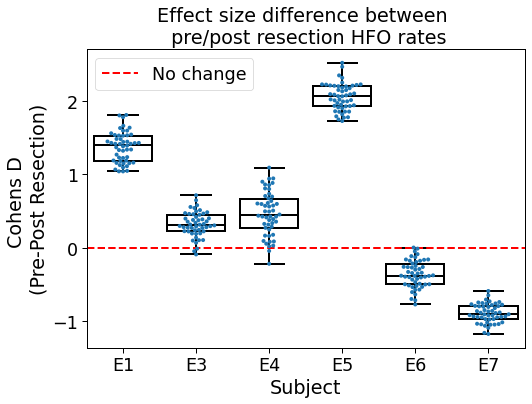

In [7]:
pal = sns.color_palette(n_colors=1)
sns.set_context("paper", font_scale=2.0)
fig, ax = plt.subplots(figsize=(8, 6))
sns.swarmplot(x='subject', y='es', data=cohens_int, ax=ax, palette=pal, size=4)
sns.boxplot(x='subject', y='es', data=cohens_int, ax=ax, color = "white", linewidth=2)
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')
ax.axhline(
    [0],
    ls="--",
    lw=2,
    color='red',
    label="No change",
)
ax.legend()
ax.set(
    #     ylim=[-1.5, 1.5],
    xlabel="Subject",
    ylabel=f"Cohens D \n(Pre-Post Resection)",
    title=f"Effect size difference between \n pre/post resection HFO rates",
)
fig.tight_layout()
plt.savefig('hfo_effect_size.pdf', bbox_inches='tight')

Display these results in a figure

In [16]:
grouped_df = cohens_int.groupby('subject')
mean = grouped_df.agg(['mean', np.std])
#stdev = grouped_df.stdev('es')
mean.drop(.columns[i], axis=1)

KeyError: '[4] not found in axis'